# 1. Central Limit Theorem

<font color='blue' size='3'><strong>As you take more samples, especially the large ones, your graph of sample means will look more like a normal distribution </strong></font>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
random.seed = 42
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from prettytable import PrettyTable
from IPython.display import HTML, display
plt.xkcd()

Output hidden; open in https://colab.research.google.com to view.

In [7]:
# BlackFriday.csv
# The dataset here is a sample of the transactions made in a retail store on BlackFriday
# https://www.kaggle.com/mehdidag/black-friday

df = pd.read_csv('BlackFriday.csv')
print("number of data points in our popultion:", df.shape)
print("% of missing values",df['Purchase'].isnull().sum() * 100 / len(df))
df.head(2)

number of data points in our popultion: (46169, 12)
% of missing values 0.0021659555112737983


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0


Number of samples in our data:  46169


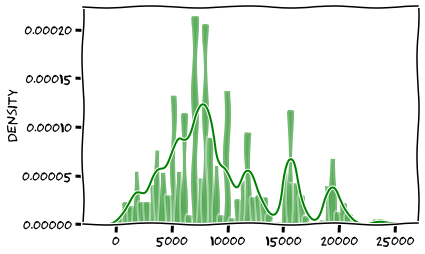

In [8]:
data = np.array(df['Purchase'].values)
print("Number of samples in our data: ",data.shape[0])
sns.distplot(data, color='g')
plt.show()
# population mean
population_mean = np.round(data.mean(),3)
# population std
population_std = np.round(data.std(),3)

__Now Let's take 100 samples with each of size 100, and try to plot the distribution of their 'mean'__

In [9]:
def get_means_of_n_samples_with_m_size(data, n, m):
    sample_mean_m_samples_n_ele = []
    for i in range(0,n):
        samples = random.sample(range(0, data.shape[0]), m)
        sample_mean_m_samples_n_ele.append(data[samples].mean())
    return sample_mean_m_samples_n_ele

In [10]:
def central_limit_theorem(data, population_mean , i, j, color, key):
    sns.distplot(np.array(data), color=color, ax=axs[i, j])
    axs[i, j].axvline(population_mean, linestyle="--", color='r', label="p_mean")
    axs[i, j].axvline(np.array(data).mean(), linestyle="-.", color='b', label="s_mean")
    axs[i, j].set_title(key)
    axs[i, j].legend()

In [11]:
sample_means = dict()

In [12]:
sample_means['100samples_50ele'] = get_means_of_n_samples_with_m_size(data,100, 50)
sample_means['1000samples_50ele'] = get_means_of_n_samples_with_m_size(data,1000, 50)

sample_means['100samples_100ele'] = get_means_of_n_samples_with_m_size(data,100, 100)
sample_means['1000samples_100ele'] = get_means_of_n_samples_with_m_size(data,1000, 100)

sample_means['100samples_1000ele'] = get_means_of_n_samples_with_m_size(data,100, 1000)
sample_means['1000samples_1000ele'] = get_means_of_n_samples_with_m_size(data,1000, 1000)

__Now Let's take 1000 samples with each of size 100, and try to plot the distribution of their 'mean'__

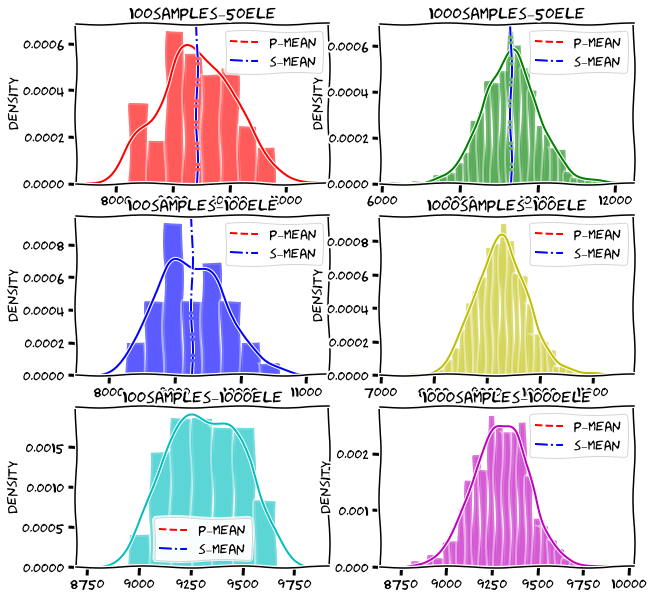

In [13]:
#red, green, blue, yellow, etc
colrs = ['r','g','b','y', 'c', 'm', 'k']
plt_grid  = [(0,0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]
sample_sizes = [(100,50), (1000, 50), (100, 100), (1000, 100), (100, 1000), (100, 1000)]

fig, axs = plt.subplots(3, 2,  figsize=(10, 10))
for i, key in enumerate(sample_means.keys()):
    central_limit_theorem(sample_means[key], population_mean , plt_grid[i][0], plt_grid[i][1] , colrs[i], key)
plt.show()

> _if we can observe the thrid row distribution plots, the larger the sample size, the more it looks like Gaussian_

__Note :__<br>
For the Central limit theorem to be valid, the samples have to be reasonably large. How large is that? It depends on how far the population distribution differs from a Gaussian distribution. Assuming the population doesn't have a really unusual distribution, a sample size of 10 or so is generally enough to invoke the Central Limit Theorem.

__ Let us get the properties of these sample distributions and compare these stats with the original distribution__

In [14]:
x = PrettyTable()
x = PrettyTable(["#samples_name", "P_Mean", "Sampel mean", "P_Std", "Sample Std", "mu_x"+u"\u2248"+"mu", "std_x"+u"\u2248"+"std/"+u"\u221A"+"n"])

for i, key in enumerate(sample_means.keys()):
    sample_mean = np.round(np.array(sample_means[key]).mean(), 3)
    sample_std = np.round(np.array(sample_means[key]).std(), 3)
    population_std_est = np.round(population_std/np.sqrt(sample_sizes[i][1]), 3)
    
    row = []
    row.append(key)
    row.append(population_mean)
    row.append(sample_mean)
    row.append(population_std)
    row.append(sample_std)
    row.append(str(sample_mean)+u"\u2248"+str(population_mean))
    row.append(str(sample_std)+u"\u2248"+str(population_std_est))
    x.add_row(row)
print(x)

+---------------------+--------+-------------+-------+------------+--------------+--------------+
|    #samples_name    | P_Mean | Sampel mean | P_Std | Sample Std |   mu_x≈mu    | std_x≈std/√n |
+---------------------+--------+-------------+-------+------------+--------------+--------------+
|   100samples_50ele  |  nan   |   9426.463  |  nan  |  620.806   | 9426.463≈nan | 620.806≈nan  |
|  1000samples_50ele  |  nan   |   9308.301  |  nan  |  711.689   | 9308.301≈nan | 711.689≈nan  |
|  100samples_100ele  |  nan   |    9257.6   |  nan  |  495.236   |  9257.6≈nan  | 495.236≈nan  |
|  1000samples_100ele |  nan   |     nan     |  nan  |    nan     |   nan≈nan    |   nan≈nan    |
|  100samples_1000ele |  nan   |     nan     |  nan  |    nan     |   nan≈nan    |   nan≈nan    |
| 1000samples_1000ele |  nan   |     nan     |  nan  |    nan     |   nan≈nan    |   nan≈nan    |
+---------------------+--------+-------------+-------+------------+--------------+--------------+


<strong><font color='green'>Observations:</font></strong>
1. If you check the above stats, we can observe the distribution of sample means, is having mean <font color='red'>$\mu_{x} \approx \mu$</font> and <font color='red'>$\sigma_{x}\approx \frac{\sigma}{\sqrt{n}}$</font>



<ul style="font-family:'Georgia';font-size:18px" >
<strong>Central Limit Theorem says: </strong>
<br>
<br>
<li>
The sampling distribution of the sample mean <font color='red'>$\overline{X}$</font>  is approximately normally distributed with mean <font color='red'>$\mu$</font> and standard deviation <font color='red'>$\frac{\sigma}{\sqrt{n}}$</font>. if the original distributions are non-normal.
</li>
<br>
<li>
The larger the sample size <font color='red'>$n$</font> is, the more normally distributed the sampling distribution will be and the more tightly it will converge about the true population mean <font color='red'>$\mu$</font>.
</li>
<br>
<li>
The sampling distribution of the sample mean <font color='red'>$\overline{X}$</font> is exactly normally distributed with mean <font color='red'>$\mu$</font> and standard deviation <font color='red'>$\frac{\sigma}{\sqrt{n}}$</font> if the original distributions are normal.</li>
</ul>

# 2. Population Mean Confidence Intervals for Larger Sampels

><strong>Note</strong>: <font color='red'>$\overline{x}$</font> is the mean of single sample,  <font color='red'>$\mu_{x}$</font> is the mean of the sampling distribution of the sample mean and <font color='red'>$\mu$</font> is the population mean

<ol style="font-size:120%;">
<li>Consider the poplulation mean is <font color='red'>$\mu$</font>, and suppose you have taken a sample and calculated its mean as <font color='red'>$\overline{x}$</font></li>
<li>Often for a given population we don't know what is the values of <font color='red'>$\mu$</font></li>
<li> Here we try to esitmate the <font color='blue'> <i>unknown</i> <font color='red'>$\mu$</font> </font>with the help of <font color='blue'> known value <font color='red'>$\overline{x}$</font> </font> </li>
</ol>

__<font  color='#7300e6'>Q: Here “Why do we need a sample mean to calculate the population mean? why can't we directly calcualte the mean of the population?” </font>__
<img src='https://i.imgur.com/rgWfmCf.png' width=150>

<font color='#339933'>
Ans: Suppose your population of interest in Delhi, and you want to know the mean age of the population.
<ul>
<li>Due to lack of time, energy, and money, you cannot obtain the age of every person in Delhi.</li> 
<li>You can select a sample (e.g. a simple random sample) and calculate the mean of that sample, <font color='red'>$\overline{x}$</font></li>
</ul>
</font>

__<font  color='#7300e6'>Q: Then “Why don’t we just use the sample mean  <font color='red'>$\overline{x}$</font> to estimate the population mean <font color='red'>$\mu$</font>?” </font>__
<img src='https://i.imgur.com/rgWfmCf.png' width=150>

<font color='#339933'>
<ul> 
<li>We can – but the sample mean <font color='red'>$\overline{x}$</font> may be quite different from the population mean <font color='red'>$\mu$</font>,even if we obtained the sample correctly.</li> 
    
<li>In addition, a single number estimate by itself, such as <font color='red'>$\overline{x}$</font>, provides no information about the precision and reliability of the estimate with respect to the larger population. </li>

</ul>
</font>

<p style="font-family:'Georgia';font-size:18px" >
Statisticians use the sample statistic <font color='red'>$\overline{x}$</font> and the population(<font color='red'>$\sigma$</font>) or sample standard deviation to provide <font color='blue'>an interval of plausible estimates</font> for the population parameter <font color='red'>$\mu$</font>. This interval is called a <font color='blue'>confidence interval.</font>
</p>

> <strong>Definition:</strong> A confidence interval is an entire interval of plausible values for a population parameter, such as <font color='red'>$\mu$</font>, based on observations obtained from a random sample of size <font color='red'>$n$</font>.

### Let us answer a question

><font color=#EB07BA > __What is the avarage money spent by Male population on black friday ?__</font>

Before we know how to estimate that lets have a look at couple of concepts
<h3>1. <font color='blue'><a href='https://en.wikipedia.org/wiki/Standard_error'>Standard error</a> </font> </h3>
<pre>
 
<li>The standard error (SE) of a statistic (usually an estimate of a parameter) is the standard deviation of its sampling distribution or an estimate of that standard deviation.</li>
<li>If the parameter or the statistic is the mean, it is called the standard error of the mean (SEM). </li>
<li>The standard error of the mean (SEM) can be expressed as: </li>
</pre>
$$\sigma_\overline{x}=\frac{\sigma}{\sqrt{n}}$$
<pre>
Since the population standard deviation is seldom known, the standard error of the mean(SEM) is usually estimated as the sample standard deviation divided by the square root of the sample size (assuming statistical independence of the values in the sample).
</pre>
$${\displaystyle {\sigma }_{\bar {x}}\ \approx {\frac {s}{\sqrt {n}}}} $$


<h3>2. <font color='blue'> $zScore$</font> and Confidence Levels:</h3>

<ul>
    <li>Let $\alpha$ be a number between 0 and 1, and let 100 * (1 – $\alpha$)% denote the confidence level.
    <br>For example, 
        <ul>
        <li>if $\alpha$ = 0.05, then the corresponding confidence level is 95%. </li>
        <li>If $\alpha$= 0.01, then the confidence level is 99%.</li>
        </ul>
    </li>
    <li>
        Suppose we have a standard normal distribution $Z$. <br>Let $z_\frac{\sigma}{2}$ denote a $zScore$ with α/2 probability to its right. <br>Similarly let -$z_\frac{\sigma}{2}$ denote a $zScore$ with α/2 probability to its left.
    </li>
    <li> Example: <img src='https://i.imgur.com/mntg6h2.png' width=700>
        The value $z_{0.10}$ is the positive z-score that has α/2 = 0.1 probability to its right. The desired $zScore$ is 1.282. <br>The value $-z_{0.25}$ is the negative z-score that has α/2 = 0.25 probability to its left. The
desired $zScore$ is -0.6745.

</ul>



In [15]:
# https://stackoverflow.com/a/20864883/4084039
import scipy.stats as st
print("zScore for 0.1 probability to right is",st.norm.ppf(1-0.10))
print("zScore for 0.25 probability to left is",st.norm.ppf(0.25))

zScore for 0.1 probability to right is 1.2815515655446004
zScore for 0.25 probability to left is -0.6744897501960817


<strong>Note:</strong> the data we have in hand might not included all the purchases that are made, and assume we have given the whole <font color='blue'>population standard deviation as 5051.</font>

In [16]:
# we are taking a sample of male persons and calculating their mean
data_male = np.array(df[df['Gender']=='M']['Purchase'].values)
samples = random.sample(range(0, data_male.shape[0]), 100)
print("the mean of money spent by sample set of 100 persons :",data_male[samples].mean())
print("Given that the we have population standard deviation : 5051")

print("From central limit theorem we can say that, the std of sampling distribution of the sample mean is \u03C3/\u221An :", 5051/10)

the mean of money spent by sample set of 100 persons : 10136.46
Given that the we have population standard deviation : 5051
From central limit theorem we can say that, the std of sampling distribution of the sample mean is σ/√n : 505.1


<img src='https://i.imgur.com/vXSIeng.jpg'>

<html>
<body>

__ We know that in normal distribution, given a data point there is $95\%$ probability that it will be within the range [ <font color='red'>$\mu-2\sigma$</font>, <font color='red'>$\mu+2\sigma$</font>] __

<ul>
    <li>The sampling distribution of the sample means is a normal distribution</li>
    <li>Any sample mean we take <font color='red'>$\overline{x}$</font> it is 95% probability that it will be within the range [ <font color='red'>$\mu_{x}-2\sigma_{x}$</font>, <font color='red'>$\mu_{x}+2\sigma_{x}$</font>] $i.e.$ for every 100 sample means typically 95 of them are in this range [ <font color='red'>$\mu_{x}-2\sigma_{x}$</font>, <font color='red'>$\mu_{x}+2\sigma_{x}$</font>]</li>
    <li>It is similar to that for any sample mean we take <font color='red'>$\overline{x}$</font> it is 95% probability that the range [ <font color='red'>$\overline{x}-2\sigma_{x}$</font>, <font color='red'>$\overline{x}+2\sigma_{x}$</font>] will contain distribution mean <font color='red'>$\mu_{x} [\approx \mu]$</font>.
    </li>
</ul>

</body>
</html>




<font color='brown'><b>Question:</b></font> Choose the best interpretation of a 95% confidence interval for the population mean μ? <br>
<font color='blue'><b>Option 1:</b></font> If repeated random samples were taken and the 95% confidence interval was computed for each sample, 95% of the intervals would contain the population mean. <br>
<font color='blue'><b>Option 2:</b></font> The probability that the population mean μ is in the confidence interval is 0.95 <br>
<font color='blue'><b>Option 3:</b></font> 95% of the population distribution is contained in the confidence interval.
<br><br>
<font color='green'><b>Answer:</b></font> The correct answer is <font color='green'><b>Option 1</b></font> please check the above 3 points, <font color='red'><b>Option 2</b></font> is incorrect because it places the probability on $\mu$, instead of on the confidence interval. <font color='red'><b>Option 3</b></font> is incorrect since the confidence interval for the population mean is built using sample means and not values from the population distribution. Using population distribution values would give us a confidence interval that is wider than the one for the population mean.

<font size='3'>From the above equations Let us construct an intravel [<font color='red'>$\overline{x}$- 2\*505.1, $\overline{x}$+2\*505.1</font>] = [<font color='red'> $\overline{x}$- 2\*$\frac{\sigma}{\sqrt{n}}$, $\overline{x}$+2\*$\frac{\sigma}{\sqrt{n}}$</font>]</font>

In [17]:
def plt_confidence_interval(data, sample_mean, population_std, i, j, color):
    sns.distplot(data, color=color, ax=axs[i, j])
    axs[i, j].axvline(data.mean(), linestyle="-", color='k', label="p_mean")
    axs[i, j].axvline(sample_mean, linestyle="--", color='m', label="s_mean")
    axs[i, j].axvline(sample_mean+2*(population_std/np.sqrt(100)), linestyle=":", color='g', label="s_mean+2*SE")
    axs[i, j].axvline(sample_mean-2*(population_std/np.sqrt(100)), linestyle=":", color='g', label="s_mean-2*SE")
    axs[i, j].legend()

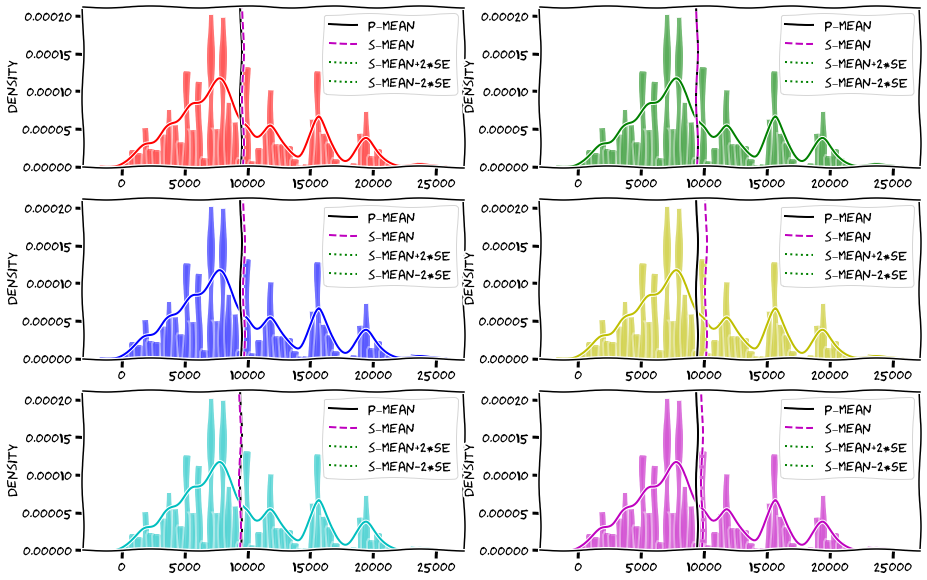

In [18]:
fig, axs = plt.subplots(3, 2,  figsize=(15, 10))
for i in range(6):
    sample = data_male[random.sample(range(0, data_male.shape[0]), 100)]
    plt_confidence_interval(data_male, np.array(sample).mean(), population_std, plt_grid[i][0],plt_grid[i][1],colrs[i])
plt.show()

In the above figure, the read line show the sample mean <font color='red'>$\overline{x}$</font> and the two green lines shows [<font color='red'> $\overline{x}$- 2\*$\frac{\sigma}{\sqrt{n}}$, $\overline{x}$+2\*$\frac{\sigma}{\sqrt{n}}$</font>]

<p style="font-family:'Georgia';font-size:22px" >Note: We have a big Assumption that, we know the population standard deviation as 5051.</p>

## 2.1 Confidence interval when don't have knowldge about population standard deviation

we know the the cofidenance interval[<font color='red'> $\overline{x}$- 2\*$\frac{\sigma}{\sqrt{n}}$, $\overline{x}$+2\*$\frac{\sigma}{\sqrt{n}}$</font>] when we know the popuplation standard deviation. If you observe here we estimating population mean with sample mean (from above pdf plots, the sample mean is almost close to population mean)

__ <font color='#E91BBC'>Can we do the similar estimation of population stadard deviation using sample stadard deviation?</font> __

<font color='#398114'><strong>Ans: Yes, We can estimate it</strong></font>


SE is used is to make confidence intervals of the unknown population mean. If the sampling distribution is normally distributed, the sample mean, the standard error, and the quantiles of the normal distribution can be used to calculate confidence intervals for the true population mean. 

The following expressions can be used to calculate the upper and lower 95% confidence limits


${\text{Upper 95%  limit}{\displaystyle ={\bar {x}}+{\text{SE}}\times 1.96}}$ <br>
${\text{Lower 95%  limit}{\displaystyle ={\bar {x}}-{\text{SE}}\times 1.96}}$

${\displaystyle {\bar {x}}} $ is equal to the sample mean, an estimation to population mean<br>
$SE$ is equal to the standard error for the sample mean, <br>
$1.96$ is the $0.975$ quantile of the normal distribution <br>

<br>
<font color='brown'> But we have taken 0.975 quantile?</font>

<font color='green'> Answer: as we need the confidence level of 95%, the ${\alpha}$ value will be 0.05, so $\frac{\alpha}{2}=0.025$
As we know <br><br>
$${\text{Upper 95%  limit}{\displaystyle ={\bar {x}}+{\text{SE}}\times z_\frac{\alpha}{2}}} = {\bar{x}}+{\text{SE}} \times z_{0.025}  = {\bar{x}}+{\text{SE}} \times 1.96 $$ <br>
$${\text{Lower 95%  limit}{\displaystyle ={\bar {x}}-{\text{SE}}\times z_\frac{\alpha}{2}}} = {\bar{x}}-{\text{SE}} \times z_{0.025}= {\bar{x}}-{\text{SE}} \times 1.96$$


<font size='3'>From the above equations Let us construct an intravel  [<font color='red'> $\overline{x}$- 2\*$\frac{s}{\sqrt{n}}$, $\overline{x}$+2\*$\frac{s}{\sqrt{n}}$</font>]</font>

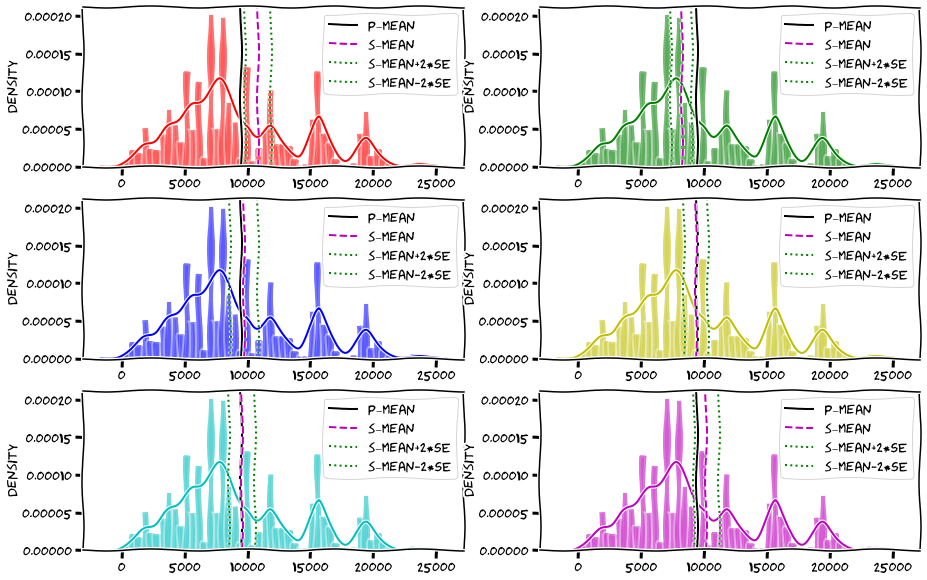

In [19]:
fig, axs = plt.subplots(3, 2,  figsize=(15, 10))
for i in range(6):
    sample = data_male[random.sample(range(0, data_male.shape[0]), 100)]
    plt_confidence_interval(data_male, np.array(sample).mean(), np.array(sample).std(), plt_grid[i][0],plt_grid[i][1],colrs[i])
plt.show()

__Conclusion: Finding Confidenace interval of population mean__
<ul>
    <li>Case 1: Knowing Population Standard Deviation <font color='red'> ${\sigma}$ </font>  
    <ol>
        <li>Get a sample with decent size(<font color='red'> $n$</font>) from population and caculate its mean <font color='red'> $\overline{x}$</font></li>
        <li>Report confidence intravel as[<font color='red'> $\overline{x}$- 2*$\frac{\sigma}{\sqrt{n}}$, $\overline{x}$+2*$\frac{\sigma}{\sqrt{n}}$</font>]</li>
    </ol>
</li>
<li>Case 2: Without Knowing Population Standard Deviation 
    <ol>
        <li>Get a sample with decent size(<font color='red'> $n$</font>) from population and caculate its mean <font color='red'> $\overline{x}$</font></li>
        <li>Calculate the sample std <font color='red'>s</font> and find the The standard error of mean or <font color='red' > SE mean </font>as  <font color='red'>$\frac{s}{\sqrt{n}}$</font>.</li>
        <li>report confidence intravel as[<font color='red'> $\overline{x}$- 2*$\frac{s}{\sqrt{n}}$, $\overline{x}$+2*$\frac{s}{\sqrt{n}}$</font>] or [<font color='red'> $\overline{x}$- 2*SE mean, $\overline{x}$+2*SE mean</font>]</li>
    </ol>
</li>
</ul>    
        

### Example Problems on confidence interval

><font color=#EB07BA >Given the population standard deviation as 5051 , and 10 samples each of size 100 and thier respective sample means is given , then what is the 95% C.I for the mean of population?.</font>

___Solution___:
<ul>
    <li>Take 10 random samples each of size 100 from our data and calculate their mean <font color='red'> $\overline{x}$</font></li>
    <li> Now for every sample , calculate the 95% C.I as [<font color='red'> $\overline{x}$- 2*$\frac{5051}{\sqrt{n}}$, $\overline{x}$+2*$\frac{5051}{\sqrt{n}}$</font>]. We get <font color='red'> 10 </font> C.I , one for each sample.</li>
    <li> Ideally, instead of 10 samples if we take 100 samples(we get 100 C.Is), 95 C.I's must catch true Pop mean, i.e. true population mean must be in range for approximately 95 Confidence Intervals. So, for 10 samples, we might see 9 C.I's catching the Pop mean. Let's see practically by comparing it with Pop mean.</li>
    </ul>

In [20]:
x = PrettyTable()
x = PrettyTable(["#samples", "Sample Size", "Sample mean", "Pop Std","Left C.I","Right C.I","Pop mean","Catch"])
male_population_std = data_male.std()
male_population_mean= np.round(data_male.mean(), 3)
for i in range(10):
    sample=data_male[random.sample(range(0, data_male.shape[0]), 100)]
    sample_mean = sample.mean()
    sample_size = len(sample)
    left_limit  = np.round(sample_mean - 2*(male_population_std/np.sqrt(sample_size)), 3)
    right_limit = np.round(sample_mean + 2*(male_population_std/np.sqrt(sample_size)), 3)
    row = []
    row.append(i+1)
    row.append(sample_size)
    row.append(sample_mean)
    row.append(population_std)
    row.append(left_limit)
    row.append(right_limit)
    row.append(male_population_mean)
    row.append((male_population_mean <= right_limit) and (male_population_mean >= left_limit))
    x.add_row(row)
print(x)

+----------+-------------+-------------+---------+----------+-----------+----------+-------+
| #samples | Sample Size | Sample mean | Pop Std | Left C.I | Right C.I | Pop mean | Catch |
+----------+-------------+-------------+---------+----------+-----------+----------+-------+
|    1     |     100     |   8532.19   |   nan   | 7527.743 |  9536.637 | 9462.394 |  True |
|    2     |     100     |   8372.65   |   nan   | 7368.203 |  9377.097 | 9462.394 | False |
|    3     |     100     |   9807.68   |   nan   | 8803.233 | 10812.127 | 9462.394 |  True |
|    4     |     100     |   10123.85  |   nan   | 9119.403 | 11128.297 | 9462.394 |  True |
|    5     |     100     |   9418.58   |   nan   | 8414.133 | 10423.027 | 9462.394 |  True |
|    6     |     100     |   9713.01   |   nan   | 8708.563 | 10717.457 | 9462.394 |  True |
|    7     |     100     |   10518.71  |   nan   | 9514.263 | 11523.157 | 9462.394 | False |
|    8     |     100     |   10101.98  |   nan   | 9097.533 | 11106.42

Now assuming that <b>we don't know the population std</b>

><font color=#EB07BA >Given 10 sample each with their sample mean and sample std find the 95% confidence interval for each of the sample and compare it with population mean.(Population Std unknown)</font>

___Solution___:
<ul>
    <li>Take 10 random samples each of size 100 from our data and calculate their mean <font color='red'> $\overline{x}$</font> and also thier standard deviation <font color='red'>$s$</font> </li>
    <li> Now for as we don't know the population deviation, we can take the standard error of mean or <font color='red' > SE mean </font>as  <font color='red'>$\frac{s}{\sqrt{n}}$</font> and calculate the 95% C.I as [<font color='red'> $\overline{x}$- 2*$\frac{s}{\sqrt{n}}$, $\overline{x}$+2*$\frac{s}{\sqrt{n}}$</font>]. We get <font color='red'> 10 </font> C.I , one for each sample.</li>
    <li> Ideally , instead of 10 samples if we take 100 samples(we get 100 C.Is), 95 C.I's must catch true Pop mean ,i.e true population mean must be in range for approximately 95 Confidence Intervals. So , for 10 samples , we might see 9 C.I's catching the Pop mean . Let's see practically by comparing it with Pop mean.</li>
    </ul>

In [21]:
x = PrettyTable()
x = PrettyTable(["#samples", "Sample Size", "Sample mean", "Pop Std","Left C.I","Right C.I","Pop mean","Catch"])
for i in range(10):
    sample=data_male[random.sample(range(0, data_male.shape[0]), 100)]
    sample_mean = sample.mean()
    sample_std =  sample.std()
    sample_size = len(sample)
    # here we are using sample standard deviation instead of population standard deviation
    left_limit  = np.round(sample_mean - 2*(sample_std/np.sqrt(sample_size)), 3)
    right_limit = np.round(sample_mean + 2*(sample_std/np.sqrt(sample_size)), 3)
    row = []
    row.append(i+1)
    row.append(sample_size)
    row.append(sample_mean)
    row.append(population_std)
    row.append(left_limit)
    row.append(right_limit)
    row.append(male_population_mean)
    row.append((male_population_mean <= right_limit) and (male_population_mean >= left_limit))
    x.add_row(row)
print(x)

+----------+-------------+-------------+---------+----------+-----------+----------+-------+
| #samples | Sample Size | Sample mean | Pop Std | Left C.I | Right C.I | Pop mean | Catch |
+----------+-------------+-------------+---------+----------+-----------+----------+-------+
|    1     |     100     |   9100.67   |   nan   | 8073.967 | 10127.373 | 9462.394 |  True |
|    2     |     100     |    9038.7   |   nan   | 8091.317 |  9986.083 | 9462.394 |  True |
|    3     |     100     |    9807.8   |   nan   | 8764.758 | 10850.842 | 9462.394 |  True |
|    4     |     100     |   9028.31   |   nan   | 8023.558 | 10033.062 | 9462.394 |  True |
|    5     |     100     |   9140.33   |   nan   | 8211.61  |  10069.05 | 9462.394 |  True |
|    6     |     100     |   9147.47   |   nan   | 8144.244 | 10150.696 | 9462.394 |  True |
|    7     |     100     |   10209.06  |   nan   | 9198.919 | 11219.201 | 9462.394 |  True |
|    8     |     100     |   9135.85   |   nan   | 8173.945 | 10097.75

# 3. Hypothesis testing for Larger Samples.

<font color='red' size=5> What is Hypothesis testing? </font>

> <font color='green'> The process of using probability and statistics to set up an experimental situation and decide whether or not to reject the “status quo” hypothesis based on sample data is called hypothesis testing. </font>

Before getting into details of how Hypothesis testing works , let us get ourselfs familiar with some terminology related to Hypothesis testing

<h3><font color='brown'> Terminology </font> </h3>

<ul>
    <li> <b> <font color='blue'> Null Hypothesis </font> </b>[$ H_0$] :  It is the “status quo” or “prior belief” .It assumes that the observation is due to a chance factor.  The null hypothesis is assumed to be true unless proven otherwise.</li>
    <li>  <b> <font color='blue'> Alternative Hypothesis </font> </b>[$ H_1$] :Contrary to the null hypothesis, the alternative hypothesis shows that observations are the result of a real effect.We reject the null hypothesis in favor of the alternative hypothesis only if there is convincing statistical evidence against $H_0$. The alternative hypothesis is sometimes referred to as the research hypothesis.</li>
</ul>

<b> Example</b>:
<img src='https://i.imgur.com/MWHcJ0c.jpg' height="200" width="200">
Suppose we wanted to determine whether a coin was fair and balanced(<b>unbiased</b>). A <b>Null hypothesis</b> states that half the flips would result in Heads and half in Tails.This can mathematically be written as follows 

$$ H_o: P(Head) = 0.5$$

Now the coin is tossed let's say 10 times and 7 Heads and 3 Tails are observed.Now <b>Alternative hypothesis</b> states that the coin is a <b>biased</b>  one as we did'nt observe equal number of Heads and Tails in our experiment.

$$ H_1: P(Head){\neq} 0.5$$

Now let's go back and visit our definition of $ H_0$ -<b>"It assumes that the observation is due to a chance factor"</b>.A chance factor is an influence that contributes randomly to each observation, and is unpredictable. <font color='#aa1103'><b>In simple sense, Null hypothesis argues that prior belief ( P(Head)= 0.5 in this case) is true and the observations from experiment is due to some randomness and hence can be ignored.</b></font>

The definition of $ H_1$ says that -<b>"Contrary to the null hypothesis, the alternative hypothesis shows that observations are the result of a real effect"</b>. Therefore <font color='#29bf03'><b>alternative hypothesis argues that observations of the experiment are biased because the coin itself is a biased-coin and not due to some chance factor.</b></font>

Now that we are done with Null hypotheis and Alternate Hypothesis , let's move to the next terms

In [22]:
count = 0
for i in range(10):
    # we are tossing a coin here
    trail = np.random.uniform(0,1)<0.5
    print(trail)
    count+=int(trail)
print("Number of heads:",count, "Number of tails:", 10-count)

True
True
False
False
False
True
False
False
False
False
Number of heads: 3 Number of tails: 7


The two types of hypothesis tests, based on the alternative hypothesis  $ H_1$, are: 
<ul>
    <li> <b> <font color='blue'> Two-sided, or two-tailed, tests: </font> </b>
         When you want to detect a difference on either side of the mean, the test is said to be two-tailed and takes the form
        $ H_1: μ{\neq} value$. The two-sided test for the above example can be given as follows,<br> $$ H_1: P(Head){\neq} 0.5$$.Graphically a two tailed test can be represented as </li>
        <img src='https://i.imgur.com/r6jgJpv.gif' height="300" width="300">
        
    
   <li>  <b> <font color='blue'> One-sided, or one-tailed, tests: </font> </b> When you want to detect a difference on only one side of the mean, the test is said to be one-sided and takes the form $ H_1: μ < value$ or $ H_1: μ > value $. One sided test for the above problem can be given as <br> $$ H_1: P(Head) > 0.5$$ <img src='https://i.imgur.com/i4PhluQ.gif' height="300" width="300"><h5 align="center">(or)</h5><br>  $$ H_1: P(Head) < 0.5$$.<br><img src='https://i.imgur.com/YDZl9Rn.gif' height="300" width="300"></li>


Note: Since we are showing the plots of normal distribution, it didn't mean that hypothesis test only applicable for only normal distribution.
</ul>


When an Hypothesis test is performed, we either have to reject Null hypothesis or fail to reject it. The possible errors that may occur are <br>
<img src='https://i.imgur.com/RMqB45E.png' width=500>

<ul>
    <li> <b> <font color='blue'> Type-I error: </font> </b>
      <ul>  <li> A Type I error occurs when the researcher rejects a null hypothesis when it is true.</li> 
            <li>The probability of committing a Type I error is called the <b>significance level</b>.</li> 
          <li>This probability is also called <b>alpha</b>, and is often denoted by <b>α</b>.</li> </ul>
        Type one error can be interpreted as-$$ α=P(Type\, I\, error)=P(Reject\, H_0 \,when\, H_0 \,is \,true)$$
        
        
   </li>
   <br>
    
   <li>  <b> <font color='blue'> Type -II error: </font> </b> 
    <ul> <li>A Type II error occurs when the researcher fails to reject a null hypothesis that is false.</li>
        <li> The probability of committing a Type II error is called <b>Beta</b>, and is often denoted by <b>β</b>.</li>
        <li>The probability of not committing a Type II error is called the <b>Power of the test</b>.</li></ul>
        Type two error can be interpreted as - $$ β=P(Type \,II \,error)=P(fail\, to \,reject\, H_0 \,when \,H_0 \,is \,actually\, false)$$
         
        
   </li>
 
   
</ul>

Note :-  We would like the probability of committing either one of these errors to be as small as possible. Unfortunately, decreasing the probability of committing one type of error only increases the probability of committing the other type of error.So our main focus of interest would be <b>Type I error</b> , i.e 𝛼

<font size=5 color='red'> Significance level (${\alpha}$)</font>

> <font color='green'>Graphically can we explain what Significance level means?</font>

The significance level determines how far out from the null hypothesis value we'll draw that line on the graph. To draw a significance level of 0.05, we need to shade the 5% of the distribution that is furthest away from the null hypothesis.

<img src='https://i.imgur.com/sLRb6Wu.png' height="500" width="500">

The shaded region is also called as <font color='red'> Critical region </font> and the if the sample mean falls into that region ,we reject the Null Hypothesis $H_0$ .<br>
<font color='blue'>What does a significance level of α = 0.05 mean? </font>It means that if H0 is actually true and the hypothesis test is repeated on different random samples of data from the same population, then we would expect H0 to be incorrectly rejected 5% of the time. 

<h3><font color='red'> $pValue$ </font></h3>

>P-values are the probability of obtaining an effect at least as extreme as the one in your sample data, assuming the truth of the null hypothesis.

$$ pValue=P(Occuring\ of observation | H_0\ is\ assumed\ to\ be\ true)$$

<h3> <font color='blue'> We fail to reject the null hypothesis $H_0$ if $p{Value> \alpha }$ and reject if  $p{Value< \alpha }$.</h3>

<pre>
<font color='orange' size=5><b>The Misunderstood p Value </b></font>
<img src='https://imgs.xkcd.com/comics/null_hypothesis.png'>
The p value is one of the most misunderstood quantities in psychological research. Even professional researchers                     misinterpret it, and it is not unusual for such misinterpretations to appear in statistics textbooks!

The most common misinterpretation is that the p value is the probability that the null hypothesis is true—that the sample result occurred by chance. For example, a misguided researcher might say that because the p value is .02, there is only a 2% chance that the result is due to chance and a 98% chance that it reflects a real relationship in the population. 
But this is incorrect. The p value is really the probability of a result at least as extreme as the sample result if the null hypothesis were true. So a p value of .02 means that if the null hypothesis were true, a sample result this extreme would occur only 2% of the time.

You can avoid this misunderstanding by remembering that the p value is not the probability that any particular hypothesis is true or false. Instead, it is the probability of obtaining the sample result if the null hypothesis were true.
</pre>
Credit: https://opentextbc.ca/researchmethods/chapter/understanding-null-hypothesis-testing/

<h3><font color='red'> $z-Score$ </font></h3>

A z-score (aka, a standard score) indicates how many standard deviations an element is from the mean. A z-score can be calculated from the following formula.<font color='red'> $$z =\frac{(\overline{x}-\mu)}{\frac{\sigma}{\sqrt{n}}}$$</font> 

Here is how to interpret z-scores.
<ul>

<li>A z-score less than 0 represents an element less than the mean.</li>
<li>A z-score greater than 0 represents an element greater than the mean.</li>
<li>A z-score equal to 0 represents an element equal to the mean.</li>
<li>A z-score equal to 1 represents an element that is 1 standard deviation greater than the mean; a z-score equal to 2, 2 standard deviations greater than the mean; etc.</li>
<li>A z-score equal to -1 represents an element that is 1 standard deviation less than the mean; a z-score equal to -2, 2 standard deviations less than the mean; etc.</li>

Enough of theory , now let's jump into Hypothesis implementation with example

## Example 1:

<img src='https://imgs.xkcd.com/comics/significant.png'>
credit: https://xkcd.com/882/

><font color='blue'>A survey shows that the average black friday sales of male is much higher(500$) when compared to that of female. A company which is planning for it's black friday sales want to know if this is true and hence wanted to take data from samples of different sizes such as 100,500,1000 from the population and note their black friday spending details.The company wants to know if there is really any difference in spending or it is just by chance(with significance leve 15%). Can you help the company come to a conclusion on this with the help of data provided about different samples?</font> 

<ol>
    <li> <b>Stating Null Hypothesis and Alternate Hypothesis</b>
        <ul>
            <li><font color='brown'> Null Hypothesis $H_0$</font>:The average spending of male and female is same i.e, $\mu_m= \mu_f$ </li>
            <li><font color='brown'> Alternative Hypothesis $H_a$</font>: The average spending of male is greater than that of female, i.e, $\mu_m > \mu_f $ </li>
        </ul>
    </li>
    <br>
    <li> <b>Choosing significance level</b>
        <ul>
            <li>As it was not mentioned in the problem we are taking the standard significance level <font color='red'> $\alpha=0.15 $</font></li>
        </ul>
    </li>
    <br>
    <li> <b>Setting up Test Statistic</b>
        <ul>
           <li><font color='brown'>How do we decide whether or not to reject the null hypothesis H0 ?</font>
               <br>a. we start by determining a test statistic with our sample data</li>
           <li><font color='brown'>What is test statistic?</font>
               <br>a. It is the evidence that we look for, to prove our null hypothesis
               <br>b. The most natural choice for a test statistic of the difference in population mean is the difference in sample mean $ \mu_m-\mu_f $.
        </ul>
    </li>
    
</ol>

 
 

In [23]:
def plt_cdfplot_withthreshold(j,c,difference,threshold,sample):
    sns.kdeplot(difference,cumulative=True,color=c, ax=axs[j])
    axs[j].axvline(threshold, linestyle="--", color='r', label=int(threshold))
    axs[j].set_title("CDF of differences for " + str(sample)+" samples")
    axs[j].legend()
    axs[j].grid()

In [24]:
def diff_in_samples(dist1, dist2, gender1, gender2):
    print("The average spendings "+str(len(dist1))+" "+gender1+" =",dist1.mean())
    print("The average spendings "+str(len(dist2))+" "+gender2+"=",dist2.mean())
    diff_in_mean = dist1.mean()-dist2.mean()
    print("The difference between mean of "+gender1+" spending and "+gender2+" spendings (diff_"+str(len(dist2))+")=",diff_in_mean)
    return diff_in_mean

In [25]:
def calculate_p_value(sample1, sample2, diff, alpha):
    #Step 2- Create list to store the average values of both the samples and the difference of them
    difference=[]
    #Sampling the data for 1000 times
    total_sample = list(sample1)
    total_sample.extend(sample2)
    total_sample = np.array(total_sample)
    for i in range(0,1000):
        #Picking 100 random numbers 
        samples = random.sample(range(0, len(total_sample)), 100)
        #First 50 random numbers are taken as set 1
        set1 = total_sample[samples[:50]].mean()
        #Next 50 random numbers are taken as set 2
        set2 = total_sample[samples[50:]].mean()
        #Taking the differnce between the two sets
        difference.append(set1 - set2)
        
    #Step3- Sorting the values and counting the number of values greater than the threshold
    difference.sort()
    count = sum(((i > diff) and (i>0)) for i in difference) 
    pValue = count/len(difference)
    print("Percentage of values greater than the difference",diff," =",pValue*100,"%")
    print("The pValue = ",pValue, "and the significance P(Reject H0 when H0 is true)=",alpha)
    if pValue>alpha:
        print("We fail to reject the null hypothesis")
    else:
        print("We can reject the null hypothesis")
    
    print('_'*50)
    return difference

<ol start=4>
    <li> <b>Calculating the P-value using Permutation test</b>
        <br>Refer- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/resampling-and-permutation-test-3/
        <ul>
            <li><font color='brown'>Q: Assuming that  $H_0$  is true, what’s the probability of obtaining $ \mu_m -  \mu_f $ = $diff\_100$ for the random sample of 100 data points each?</font></li>
        </ul>
    </li>
</ol> 

For Sample Size:  200
The average spendings 100 male = 9252.66
The average spendings 100 female= 9304.11
The difference between mean of male spending and female spendings (diff_100)= -51.45000000000073
Percentage of values greater than the difference -51.45000000000073  = 50.9 %
The pValue =  0.509 and the significance P(Reject H0 when H0 is true)= 0.15
We fail to reject the null hypothesis
__________________________________________________
For Sample Size:  1000
The average spendings 500 male = 9323.776
The average spendings 500 female= 8462.274
The difference between mean of male spending and female spendings (diff_500)= 861.5020000000004
Percentage of values greater than the difference 861.5020000000004  = 17.9 %
The pValue =  0.179 and the significance P(Reject H0 when H0 is true)= 0.15
We fail to reject the null hypothesis
__________________________________________________
For Sample Size:  2000
The average spendings 1000 male = 9575.393
The average spendings 1000 female= 8436.57


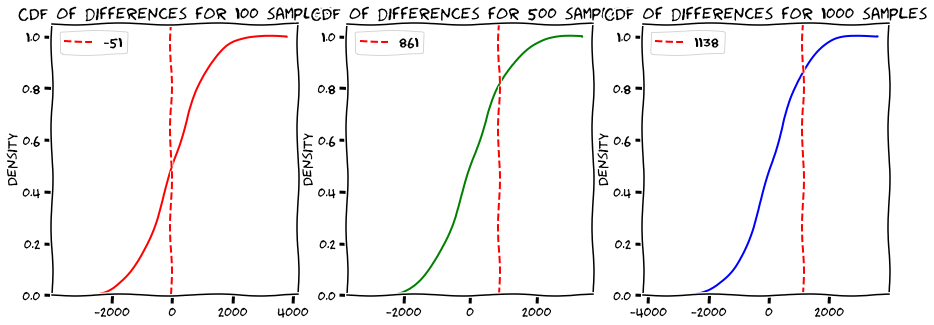

In [26]:
data_female = np.array(df[df['Gender']=='F']['Purchase'].values)
sample_sizes = [100, 500, 1000]
alpha = 0.15
fig, axs = plt.subplots(1, 3,figsize=(15, 5))
for j, i in enumerate(sample_sizes):
    print("For Sample Size: ", 2*i)
    
    female_sample=data_female[random.sample(range(0, data_female.shape[0]), i)]
    male_sample=data_male[random.sample(range(0, data_male.shape[0]), i)]
    
    diff_in_mean = diff_in_samples(male_sample,female_sample, "male", "female")
    
    #Step 1- Combine both samples of size 50 each to a large sample of size 100 to simulate null hypothesis
    differences = calculate_p_value(male_sample, female_sample,diff_in_mean, alpha)
    plt_cdfplot_withthreshold(j, colrs[j],differences,threshold=diff_in_mean,sample=i)

If we reject the null hypothesis, we do not prove the alternative hypothesis is true. We merely state there is sufficient evidence to reject the null hypothesis.

If we fail to reject the null hypothesis, we do not prove the null hypothesis is true. We merely state there is not sufficient evidence to reject the null hypothesis.

Unfortunately, whatever the decision, there is always a chance we made an error!

> <h4> <font size=4 color='#339933'> A company wants know if black friday spendings of males follow a normal distribution.A sample of 30 males were asked about thier spendings and thier answers were recorded. Determine if this sample comes from normal distribution with 5% signinifance level.  </font> </h4>

__<font  color='#7300e6'>Q:Given two samples, how can we find whether they are follow same distribution or not? </font>__
<img src='https://i.imgur.com/rgWfmCf.png' width=150>

<font color='#339933'>
    Ans: <font color='red'>Q-Q Plot </font>can be used for graphically visualize how two distributions are ,but Q-Q plot cannot quantify how much different one distribution is to another. Therefore we cannot perform Hypothesis testing using Q-Q plot.

</font>

__<font color='#7300e6'>Q:Then how to measure the Similarity ?</font>__

><font color='green'>The Kolmogorov-Smirnov test (KS-test) tries to determine if two datasets differ significantly. The KS-test has the advantage of making no assumption about the distribution of data</font>

KS Test can be performed for two types of problems.
1. There's the <b>one sample Kolmogorov-Smirnov test</b> for testing if a variable follows a given distribution in a population. This “given distribution” is usually -not always- the normal distribution, hence “Kolmogorov-Smirnov normality test”. 
2. There's also the <b>independent samples Kolmogorov-Smirnov test</b> for testing if a variable has identical distributions in 2 populations.

How to perform KS Test?

1. State the Null hypothesis that both the random variables come from same distribution
2. State the  Alternative hypothesis that both the random variables do not come from same distribution
3. Setup a confidence interval value
4. Calculate the D value using following formula $D_n,_m=Maximum|F_n(X)−F_m(X)|$
5. The null hypothesis is rejected at level $\alpha $ if $$D_{n,m} > c(\alpha) \sqrt(\frac{n+m}{nm})$$ where $c(\alpha)=\sqrt(-\frac{1}{2}log_e\alpha)$ <br> $n$,$m$ =number of points in samples.

### KS test in Python

KS Test in python can be performed using <b>scipy.stats.ks_2samp</b> api


  <h4><font color='blue'> Step 1:</font> <b>Stating Null Hypothesis and Alternate Hypothesis</b></h4>
 

<font color='brown'> Null Hypothesis $H_0$</font>:The black friday spendings of males follow a normal distribution.<br>
<font color='brown'> Alternative Hypothesis $H_a$</font>: The black friday spendings of males do not follow a normal distribution.

In [27]:
# Taking one sample of size 500 from unknown disb
samples = np.array(random.sample(range(0, data_male.shape[0]), 30))
samples = (samples-samples.mean())/samples.std()

# Taking a sample of size 1000 from known disb
norm_samples=np.random.normal(loc=0.0, scale=1.0, size=30)
# norm_samples=(normal-normal.mean())/normal.std()

In [28]:
sorted_data = np.sort(samples)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)


norm_sorted_data = np.sort(normal)
norm_yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)

plt.plot(sorted_data,yvals,label='Sample dist')
plt.plot(norm_sorted_data,norm_yvals,label='Normal disb')

plt.legend()
plt.show()

NameError: ignored

<font color='blue'> Step 2:</font> <b>Choosing significance level</b>

 Note that the significance level is  mentioned in the problem.<font color='red'> $$\alpha=0.05 $$</font>

<font color='blue'> Step 3:</font> <b>Calculating the test statistic</b>

<ul>
    <li>Here the test statistic we are dealing with is $D_N,_M$</li>
    <li> $D_N,_M$ is maximum distance between CDF of two distributions 
</ul>

In [ ]:
#https://github.com/scipy/scipy/blob/v0.14.0/scipy/stats/stats.py#L3809
#sorting the data
data1 = np.sort(samples)
data2 = np.sort(norm_samples)
#storing the length of data
n1 = data1.shape[0]
n2 = data2.shape[0]
data_all = np.concatenate([data1, data2])
#calculating cdf
cdf1 = np.searchsorted(data1, data_all, side='right') / n1
cdf2 = np.searchsorted(data2, data_all, side='right') / n2
# d=max(abs(cdf1-cdf2))
d = np.max(np.absolute(cdf1 - cdf2))

In [ ]:
print('The test statictic d=',d)

<h4> Calculating test statistic using scipy.stats api </h4>

In [ ]:
from scipy.stats import ks_2samp
d,p=ks_2samp(norm_samples,samples)

In [ ]:
print('The D value when calculated using scipy.stats api is',d ,'which is exactly equal to value we got')

In [ ]:
print('Corresponding P value for the D is ',p)

<font color='blue'> Step 4:</font> <b>Comparing P value with Significance level</b>

<font> We can clearly observe that P value <font color='red'>0.75 > 0.05</font> and hence we <b>fail to reject the null </b> hypothesis $H_0$ that both the first sample come from normal distribution </font>